In [27]:
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import sys
sys.path.append('../scores')
from interactions import *
from pdpbox import pdp
import pandas as pd
import os
from scipy.stats import random_correlation
from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
from run_sim import *

# analyze curves

In [84]:
# by default train on 70,000, C=1
# sim_results: 5-vars, train on 70,000, randomly draw eigenvals - didn't quite finish (36 / 50)
# sim_results_fix_cov: 5-vars, train on 70000, fix eigenvals (to 2, 2, 1, 1, 0)
# sim_results_fix_cov_10_C=1 (5-var func, train on 70,000), fix eigenvals to 4, 3, 2, 1, 0, 0, 0, ..., 0
# sim_results_iid_5_C=1
# sim_results_fix_cov_C=0.25

# failed to run
# sim_results_fix_cov_5_C=1_big (run w/ 500,000 points)
# sim_results_fix_cov_5_C=0.25_big (run w/ C=0.25)

out_dir = '/scratch/users/vision/chandan/rf_sims/'
print(os.listdir(out_dir))
out_dir = oj(out_dir, 'sim_results_fix_cov')
curves_list = [pkl.load(open(oj(out_dir, f'curves_1d_{i}.pkl'), 'rb')) for i in range(1, 11)]

['sim_results_fix_cov_10_C=1', 'sim_results_iid_5_C=1', 'sim_results_fix_cov', 'sim_results_fix_cov_5_C=0.25', 'sim_results', 'sim_results_10d', 'sim_results_fix_cov_5_C=1_big']


In [85]:
mse_dac, mse_pdp = [], []
corr_dac, corr_pdp = [], []
for func_num in range(10):
    curves = curves_list[func_num]
    for i in range(len(curves)):
        curves_i = curves[i]
        exp = curves_i['exp']
        dac = curves_i['dac']
        pdp_xi = curves_i['pdp']
        mse_dac.append(np.mean((exp - dac) ** 2))
        mse_pdp.append(np.mean((exp - pdp_xi) ** 2))
        corr_dac.append(np.corrcoef(dac, exp)[0, 1])
        corr_pdp.append(np.corrcoef(pdp_xi, exp)[0, 1])

**plot results**

	  dac,   pdp
mse means 0.553, 1.459
corr means 0.845, 0.788
mse medians 0.118, 0.200
corr medians 0.872, 0.922


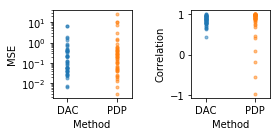

In [86]:
num_pts = len(mse_dac)

plt.figure(figsize=(4, 2))
R, C = 1, 2
plt.subplot(R, C, 1)
plt.plot([0] * num_pts, mse_dac, '.', alpha=0.5)
plt.plot([1] * num_pts, mse_pdp, '.', alpha=0.5)
plt.ylabel('MSE')
plt.yscale('log')
plt.xticks([0, 1], ['DAC', 'PDP'])
plt.xlim((-0.3, 1.3))
plt.xlabel('Method')


plt.subplot(R, C, 2)
plt.plot([0] * num_pts, corr_dac, '.', alpha=0.5)
plt.plot([1] * num_pts, corr_pdp, '.', alpha=0.5)
plt.ylabel('Correlation')
plt.xticks([0, 1], ['DAC', 'PDP'])
plt.xlim((-0.3, 1.3))
plt.xlabel('Method')

plt.tight_layout()
plt.savefig('scores.pdf')

print('\t  dac,   pdp')
print(f'mse means {np.mean(mse_dac):0.3f}, {np.mean(mse_pdp):0.3f}')
print(f'corr means {np.mean(corr_dac):0.3f}, {np.mean(corr_pdp):0.3f}')


print(f'mse medians {np.median(mse_dac):0.3f}, {np.median(mse_pdp):0.3f}')
print(f'corr medians {np.median(corr_dac):0.3f}, {np.median(corr_pdp):0.3f}')
plt.show()

# print table

In [87]:
mse_dac, mse_pdp = [], []
corr_dac, corr_pdp = [], []
for func_num in range(10):
    curves = curves_list[func_num]
    mse_daci, mse_pdpi = [], []
    corr_daci, corr_pdpi = [], []
    for i in range(len(curves)):
        curves_i = curves[i]
        exp = curves_i['exp']
        dac = curves_i['dac']
        pdp_xi = curves_i['pdp']
        mse_dac.append(np.mean((exp - dac) ** 2))
        mse_pdp.append(np.mean((exp - pdp_xi) ** 2))
        corr_dac.append(np.corrcoef(dac, exp)[0, 1])
        corr_pdp.append(np.corrcoef(pdp_xi, exp)[0, 1])
        
        mse_daci.append(np.mean((exp - dac) ** 2))
        mse_pdpi.append(np.mean((exp - pdp_xi) ** 2))
        corr_daci.append(np.corrcoef(dac, exp)[0, 1])
        corr_pdpi.append(np.corrcoef(pdp_xi, exp)[0, 1])        
#     print(f'{np.mean(mse_daci):0.3f} & {np.mean(mse_daci) / np.sqrt(len(mse_daci)):0.3f} & \
#     {np.mean(mse_pdpi):0.3f} & {np.mean(mse_pdpi) / np.sqrt(len(mse_pdpi)):0.3f} & \
#     {np.mean(corr_daci):0.3f} & {np.mean(corr_daci) / np.sqrt(len(corr_daci)):0.3f} & \
#     {np.mean(corr_pdpi):0.3f} & {np.mean(corr_pdpi) / np.sqrt(len(corr_pdpi)):0.3f}')
    

# print('total')    
# print(f'{np.mean(mse_dac):0.3f} & {np.mean(mse_dac) / np.sqrt(len(mse_dac)):0.3f} & \
#     {np.mean(mse_pdp):0.3f} & {np.mean(mse_pdp) / np.sqrt(len(mse_pdp)):0.3f} & \
#     {np.mean(corr_dac):0.3f} & {np.mean(corr_dac) / np.sqrt(len(corr_dac)):0.3f} & \
#     {np.mean(corr_pdp):0.3f} & {np.mean(corr_pdp) / np.sqrt(len(corr_pdp)):0.3f}')

print(f'& {np.mean(mse_dac):0.3f} $\pm$ {np.mean(mse_dac) / np.sqrt(len(mse_dac)):0.3f} & \
    {np.mean(mse_pdp):0.3f} $\pm$ {np.mean(mse_pdp) / np.sqrt(len(mse_pdp)):0.3f} \\\\') # & \
#     {np.mean(corr_dac):0.3f} $\pm$ {np.mean(corr_dac) / np.sqrt(len(corr_dac)):0.3f} & \
#     {np.mean(corr_pdp):0.3f} $\pm$ {np.mean(corr_pdp) / np.sqrt(len(corr_pdp)):0.3f}')
        
print(f'mse means {np.mean(mse_dac):0.3f}, {np.mean(mse_pdp):0.3f}')
print(f'corr means {np.mean(corr_dac):0.3f}, {np.mean(corr_pdp):0.3f}')

print(f'mse medians {np.median(mse_dac):0.3f}, {np.median(mse_pdp):0.3f}')
print(f'corr medians {np.median(corr_dac):0.3f}, {np.median(corr_pdp):0.3f}')

& 0.553 $\pm$ 0.081 &     1.459 $\pm$ 0.213 \\
mse means 0.553, 1.459
corr means 0.845, 0.788
mse medians 0.118, 0.200
corr medians 0.872, 0.922


**look at curves**

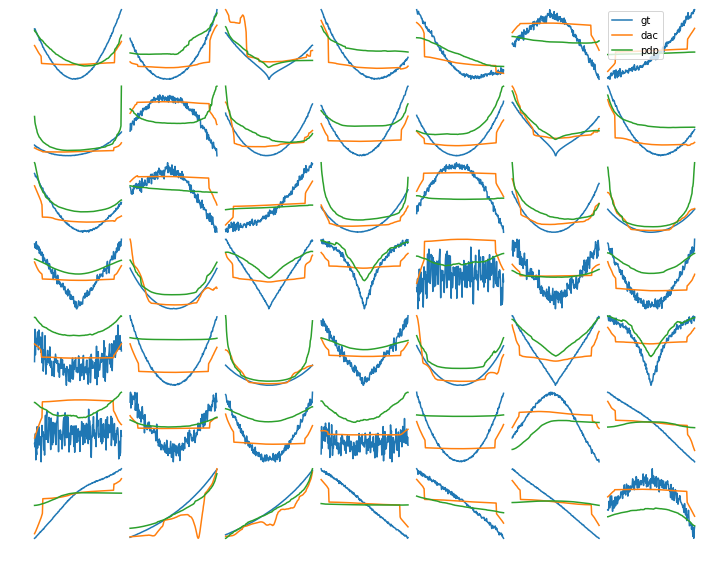

In [45]:
num_vars = 10
R, C = 7, 7
count = 1
plt.figure(figsize=(10, 8))
for func_num in range(10):
    curves = curves_list[func_num]
    
    for i in range(len(curves)):
        if count > R * C:
            break        
        plt.subplot(R, C, count)
        curves_i = curves[i]
        plt.plot(curves_i['exp'], label='gt')
        plt.plot(curves_i['dac'], label='dac')
        plt.plot(curves_i['pdp'], label='pdp')
        plt.axis('off')
        if count == C:
            plt.legend()
            
        count += 1
        

            
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('curves.pdf')
plt.show()